## 

# Análisis

##### Comenzamos con un resumen de lo que vamos a ver en el servidor.

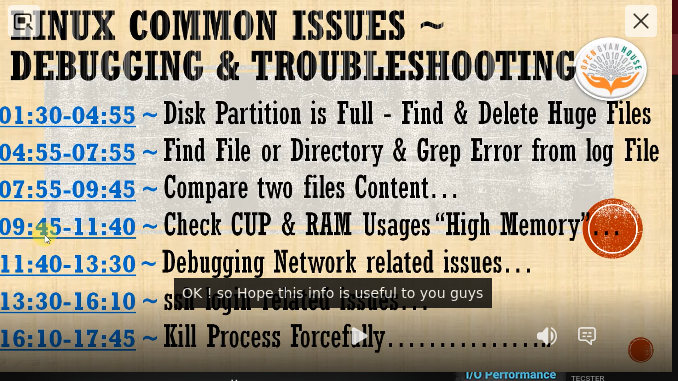

##### En este ejemplo, el comando que se ejecutará es df -h. La opción shell=True le dice a subprocess que debe ejecutar el comando en una terminal de Bash. La opción check=True hace que el script se detenga si el comando devuelve un código de salida diferente de cero. La opción stdout=subprocess.PIPE hace que el resultado del comando se almacene en la variable proceso.stdout, que luego se convierte a una cadena de texto y se imprime en la consola.

In [1]:
import subprocess

# Definir el comando que deseas ejecutar
comando = "df -h"

# Ejecutar el comando en una terminal de Bash
proceso = subprocess.run(comando, shell=True, check=True, stdout=subprocess.PIPE, stderr=subprocess.PIPE)

# Imprimir la salida del comando
print(proceso.stdout.decode())


S.ficheros     Tamaño Usados  Disp Uso% Montado en
tmpfs            1,6G   3,7M  1,6G   1% /run
/dev/nvme0n1p6    46G    36G  8,0G  82% /
tmpfs            7,8G    39M  7,7G   1% /dev/shm
tmpfs            5,0M   4,0K  5,0M   1% /run/lock
/dev/nvme0n1p1    96M    38M   59M  40% /boot/efi
tmpfs            1,6G   2,4M  1,6G   1% /run/user/1000
/dev/sr0         7,0M   7,0M     0 100% /media/michel/WD Unlocker
/dev/sda1        932G   359G  573G  39% /media/michel/PapaCifrado



##### Podemos observar que le directorio raiz / está al 82%. Nos dirigimos a él y le pasamos el comando `du -sh *` por consola.

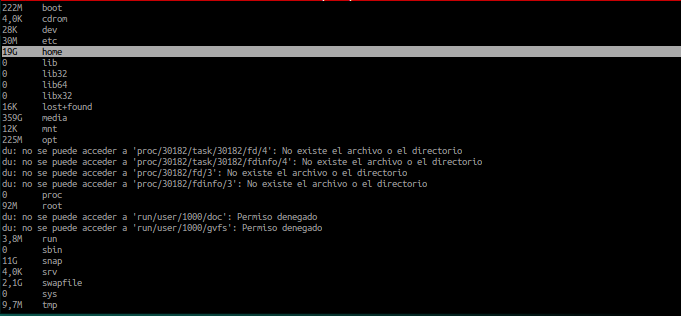

##### Dentro del directorio /home le pasamos el comando `ls -lrt` para ver el contenido. Volvemos a pasarle el comando `du -sh *` y observamos que son dos directorios los que ocupan más. El directorio /ISOS y el directorio /Descargas.